<a href="https://colab.research.google.com/github/KeerthivasanR03/mnist_classification/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone, BaseEstimator
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve

from sklearn.linear_model import SGDClassifier

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = np.array(mnist['data']), mnist['target']

In [ ]:
some_digit = (X[0].reshape(1, -1))
some_digit_image = some_digit.reshape(28,28)

In [6]:
y = y.astype(np.uint8)

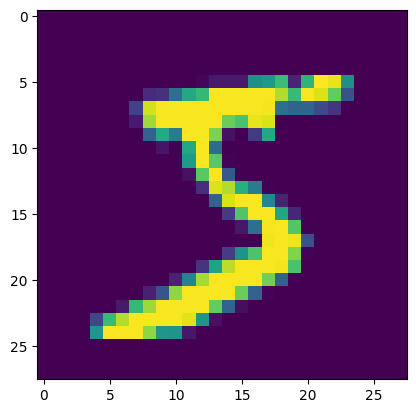

In [ ]:
plt.imshow(some_digit_image)

In [7]:
X_train, X_test, y_train, y_test = X[:60000, ], X[60000:], y[:60000], y[60000:]

## **BinaryClassifier**

In [8]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [9]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict(some_digit)

array([ True])

In [ ]:
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

0.9669
0.91625
0.96785


In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

KeyboardInterrupt: 

In [ ]:
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

**Precision-Recall curve**

In [10]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [11]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [12]:
def precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label="precision")
  plt.plot(thresholds, recalls[:-1], "g--", label="recall")


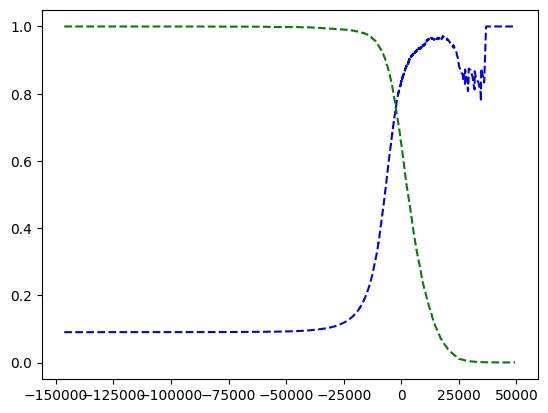

In [13]:
precision_recall_vs_threshold(precisions, recalls, thresholds)

**np-argmax for getting the first threshold value which is greater than 90**

In [14]:
threshold_90_precision = thresholds[np.argmax(precisions>=90)]

In [15]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [17]:
y_train_pred_90

array([ True,  True,  True, ...,  True,  True,  True])

In [18]:
precision_score(y_train_5, y_train_pred_90)

0.09035

In [20]:
recall_score(y_train_5, y_train_pred_90)

1.0

## **The ROC Curve**

In [25]:
#The receiver operating characteristic
#for binary classifier
from sklearn.metrics import roc_curve, roc_auc_score

In [22]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

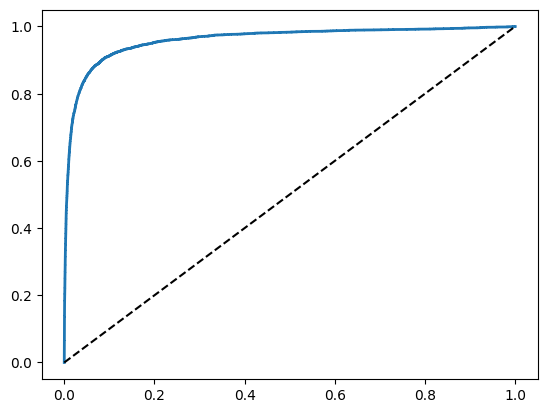

In [24]:
plot_roc_curve(fpr, tpr)

In [26]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616